In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw=pd.read_excel("./../Problem_C_Data_Wordle.xlsx")
dateAndrepos=raw.loc[:,['Date','Number of  reported results']]
dateAndrepos

,Date,Number of reported results
0,1/7/22,80630
1,1/8/22,101503
2,1/9/22,91477
3,1/10/22,107134
4,1/11/22,153880
...,...,...
350,12/27/22,20879
351,12/28/22,20160
352,12/29/22,20001
353,12/30/22,21204


0      18999
1      19000
2      19001
3      19002
4      19003
       ...  
350    19353
351    19354
352    19355
353    19356
354    19357
Name: Date, Length: 355, dtype: int32

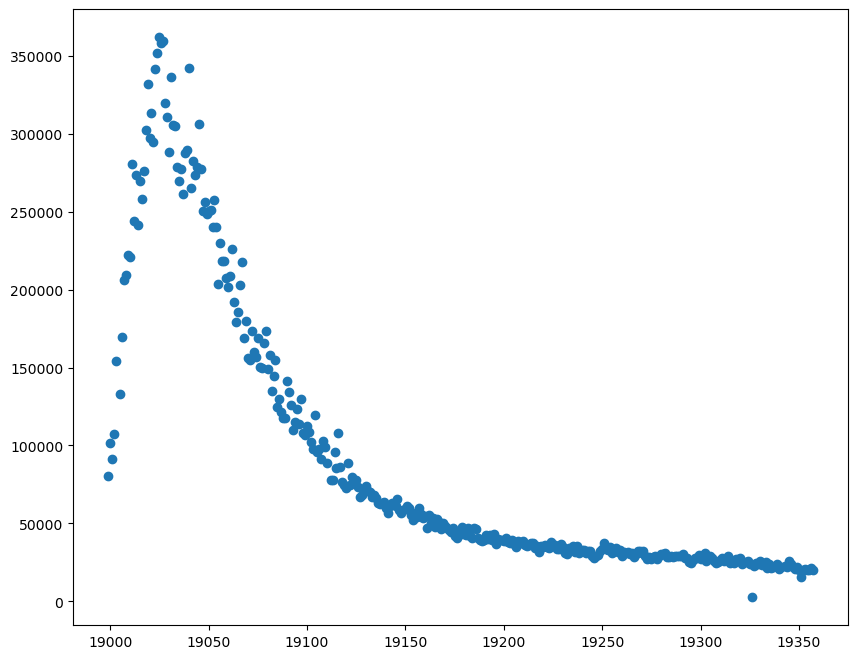

In [3]:
# 时间数字化
date = dateAndrepos['Date'].apply(lambda x:pd.to_datetime(x))
date=(pd.to_numeric(pd.to_datetime(date))/(3600*24*1e9)).astype(int)
repos=dateAndrepos['Number of  reported results']

plt.figure(figsize=(10, 8))

plt.scatter(date, dateAndrepos['Number of  reported results'])
date

ADF统计量: -5.465670
p-value: 0.000002
Lags used: 17
观测值的个数: 336
临界值(1): -3.449963
临界值(5): -2.870181
临界值(10): -2.571373


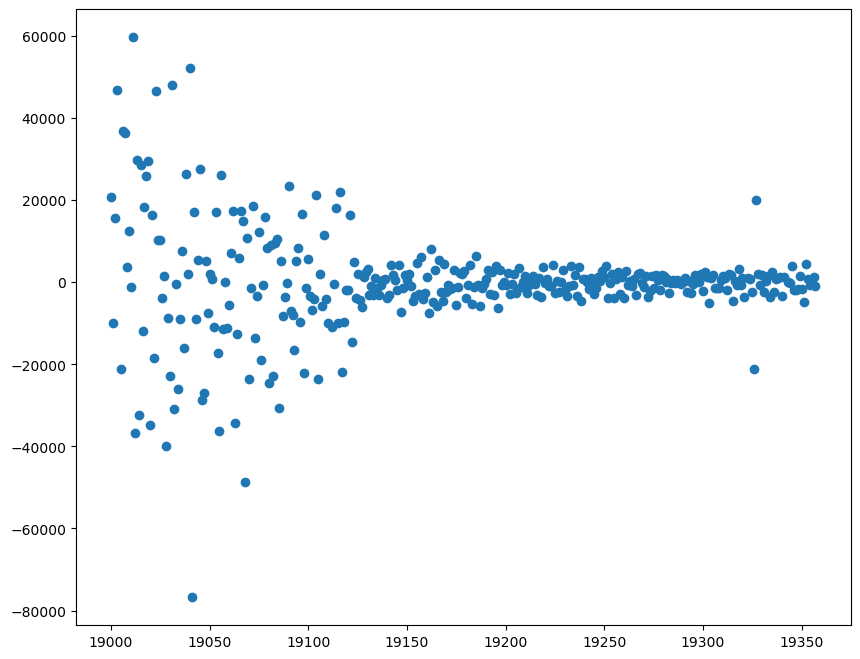

In [4]:
# 平稳性检验
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_predict


def ADFCheck(ts):
    result = sm.tsa.adfuller(ts)
    # 打印ADF检验的结果
    print('ADF统计量: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Lags used: %d' % result[2])
    print('观测值的个数: %d' % result[3])
    print('临界值(1): %f' % result[4]['1%'])
    print('临界值(5): %f' % result[4]['5%'])
    print('临界值(10): %f' % result[4]['10%'])

    return result

repo_diff1=repos.diff(1)
ADFCheck(repo_diff1.dropna())
plt.figure(figsize=(10, 8))
plt.scatter(date, repo_diff1)

# 虽然貌似不用差分，原数据就已经满足平稳性，不过显然差分一次更平稳，那就差分一次

d:\Pro\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Pro\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\Pro\miniconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Pro\miniconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Pro\miniconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Lik

{'aic':              0            1            2            3            4
0  9433.734215  7667.792638  7666.640781  7682.904235  7671.580742
1  7659.236082  7660.426849  7664.527381  7681.617957  7645.224153
2  7660.273371  7662.377298  7666.303083  7657.638114  7647.230662
3  7660.491862  7663.106828  7655.134210  7640.231662  7621.704958
4  7663.039864  7643.110135  7608.901855  7657.425281  7612.979953, 'bic':              0            1            2            3            4
0  9441.478450  7679.408992  7682.129252  7702.264824  7694.813449
1  7670.852435  7675.915320  7683.887970  7704.850663  7672.328978
2  7675.761842  7681.737887  7689.535790  7684.742938  7678.207605
3  7679.852451  7686.339534  7682.239034  7671.208604  7656.554018
4  7686.272571  7670.214959  7639.878797  7692.274341  7651.701131, 'aic_min_order': (4, 2), 'bic_min_order': (4, 2)}
                                    SARIMAX Results                                    
Dep. Variable:     Number of  reported re

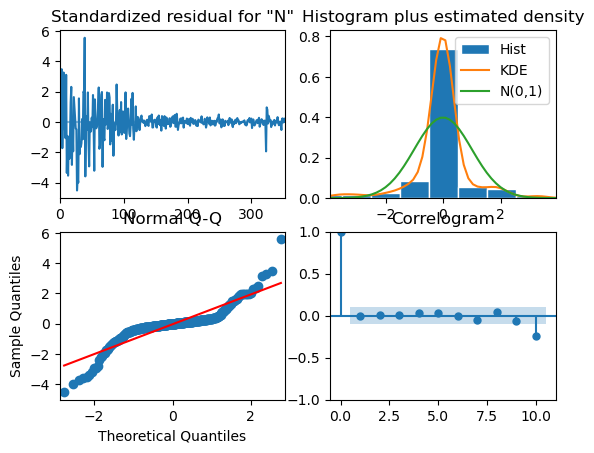

<Figure size 1000x800 with 0 Axes>

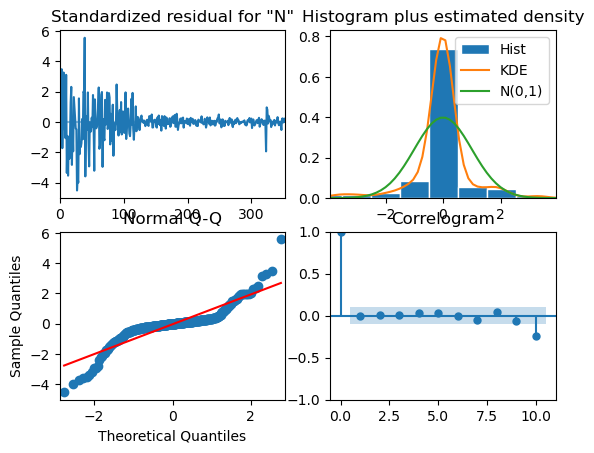

In [5]:
# 暴力搜索所有可能的ARIMA模型
arima_order = sm.tsa.arma_order_select_ic(repo_diff1, max_ar=4, max_ma=4, ic=['aic', 'bic'], trend='c')

# 打印所有可能模型的AIC和BIC
print(arima_order)

# 选择具有最小AIC和BIC的模型
p, q = arima_order.aic_min_order
model = sm.tsa.ARIMA(repo_diff1, order=(p, 1, q))
result = model.fit()

# 打印模型信息和诊断结果
print(result.summary())
plt.figure(figsize=(10, 8))
result.plot_diagnostics()

In [1]:
{'aic':              0            1            2            3            4
0  9433.734215  7667.792638  7666.640781  7682.904235  7671.580742
1  7659.236082  7660.426849  7664.527381  7681.617957  7645.224153
2  7660.273371  7662.377298  7666.303083  7657.638114  7647.230662
3  7660.491862  7663.106828  7655.134210  7640.231662  7621.704958
4  7663.039864  7643.110135  7608.901855  7657.425281  7612.979953, 
'bic':              0            1            2            3            4
0  9441.478450  7679.408992  7682.129252  7702.264824  7694.813449
1  7670.852435  7675.915320  7683.887970  7704.850663  7672.328978
2  7675.761842  7681.737887  7689.535790  7684.742938  7678.207605
3  7679.852451  7686.339534  7682.239034  7671.208604  7656.554018
4  7686.272571  7670.214959  7639.878797  7692.274341  7651.701131, 'aic_min_order': (4, 2), 'bic_min_order': (4, 2)}
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     Number of  reported results   No. Observations:                  355
Model:                          ARIMA(4, 1, 2)   Log Likelihood               -3808.753
Date:                         Sat, 18 Feb 2023   AIC                           7631.505
Time:                                 16:30:44   BIC                           7658.590
Sample:                                      0   HQIC                          7642.281
                                         - 355                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2273      0.140     -1.622      0.105      -0.502       0.047
ar.L2         -0.0956      0.078     -1.229      0.219      -0.248       0.057
ar.L3         -0.2858      0.049     -5.838      0.000      -0.382      -0.190
ar.L4         -0.1441      0.058     -2.475      0.013      -0.258      -0.030
ma.L1         -1.2085      0.137     -8.837      0.000      -1.476      -0.940
ma.L2          0.3280      0.120      2.735      0.006       0.093       0.563
sigma2      1.321e+08   3.33e-09   3.97e+16      0.000    1.32e+08    1.32e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               767.01
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.95e+31. Standard errors may be unstable.
Figure(640x480)


SyntaxError: invalid syntax (1040087985.py, line 1)

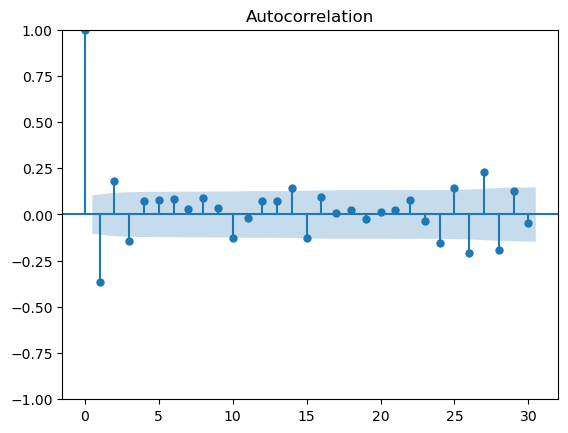

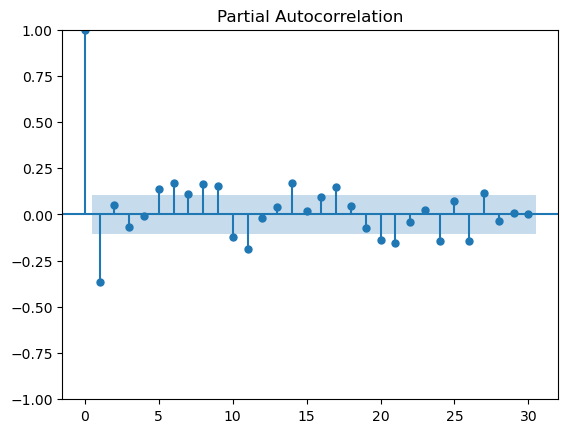

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plt.figure(figsize=(40, 15))
plot_acf(repo_diff1.dropna(), lags=30)
plt.show()
plot_pacf(repo_diff1.dropna(), lags=30, method='ywm')
plt.show()

可以选p=20, q=5, d=1

In [8]:
train_test_rate = 0.8
train_validate_rate = 0.8

dataSet=repo_diff1.dropna()
# dataSet = (dataSet-dataSet.mean())/dataSet.std()
# dataSet=dataSet/(dataSet.max()-dataSet.min())

test_split = int(train_test_rate*len(dataSet))
validate_split = int(train_validate_rate*test_split)

trainningSet=dataSet.loc[0:test_split]
testSet=dataSet.loc[test_split+1:len(dataSet)]
validateSet=trainningSet.loc[validate_split+1:len(trainningSet)]
trainningSet=trainningSet.loc[0:validate_split]

p,d,q=20,1,5

def TrainTest_ARIMA(train, test, order, showPic=True, method='statespace'):
    # Train
    model=ARIMA(train, order=order).fit(method=method)# type: ARIMAResults

    # test
    prd=model.predict(len(train), len(train)+len(test)-1)
    if showPic:
        plt.plot(range(0, len(train)+len(test)), np.append(train, test))
        plt.plot(range(len(train), len(train)+len(prd)), prd)
        plt.show()

        plt.plot(range(0,len(test)), test)
        plt.plot(range(0,len(prd)), prd)
        plt.show()

    # count
    return ((prd-test)**2).sum()


# trainningSet
# validateSet
# testSet

# errorArima = TrainTest_ARIMA(trainningSet.to_numpy(), validateSet.to_numpy(), (p,d,q))

pqTests = pd.DataFrame(index=range(2, 34, 4), columns=range(2, 10))

for pTest in pqTests.index:
    for qTest in pqTests.columns:
        pqTests.at[pTest,qTest] = TrainTest_ARIMA(trainningSet.to_numpy(), validateSet.to_numpy(), (pTest, d, qTest), False)

# dataSet
pqTests


,2,3,4,5,6,7,8,9
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\31368\AppData\Local\Temp\ipykernel_22936\1233656525.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


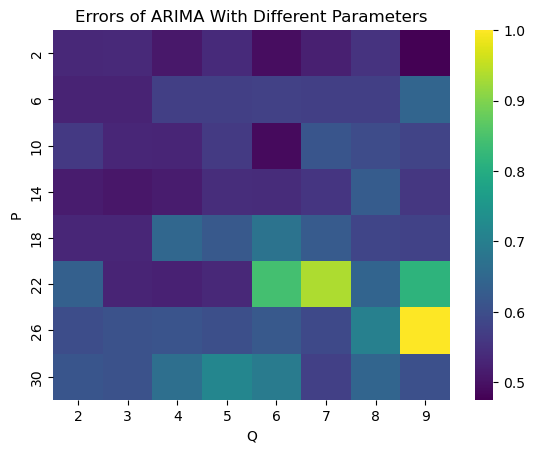

In [331]:
import seaborn as sb

fig,ax=plt.subplots()
sb.heatmap((pqTests/pqTests.max().max()).astype(float), cmap="viridis")
ax.set_title("Errors of ARIMA With Different Parameters")
ax.set_ylabel("P")
ax.set_xlabel("Q")
fig.show()

# pqTests.to_excel("P&Q Test_burg.xlsx")

MultiIndex([], )


d:\Pro\miniconda\lib\site-packages\statsmodels\tsa\arima\model.py:403: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


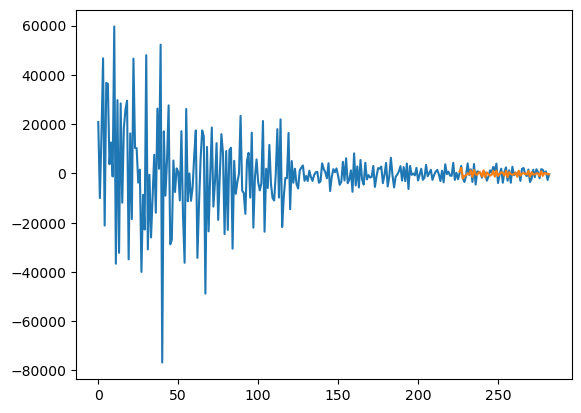

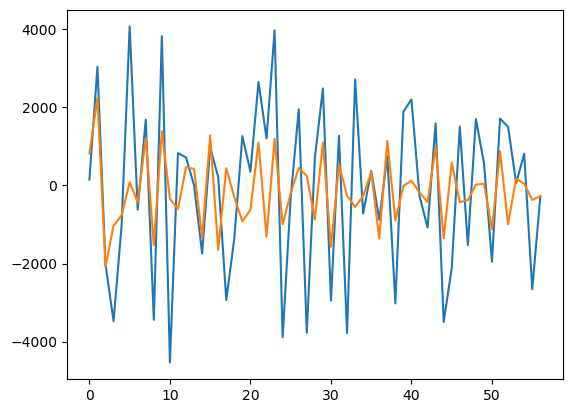

194875069.8619017

In [9]:
"""选择里面误差较小的作为参数"""

indices = pqTests.where(pqTests<260355436).stack().index
print(indices)

TrainTest_ARIMA(trainningSet.to_numpy(), validateSet.to_numpy(), (18, d, 8), True,'innovations_mle')
# TrainTest_ARIMA(np.append(trainningSet, validateSet), testSet, (18,1,8), True, 'innovations_mle')

In [10]:
# TrainTest_ARIMA(np.append(trainningSet, validateSet), testSet, (10,1,2))
model = ARIMA(np.append(trainningSet, validateSet), order=(18, 1, 8)).fit(method='innovations_mle')# type:ARIMAResults
forecast = model.get_forecast(steps=len(testSet), alpha=0.01, typ='mean') 
confs=forecast.conf_int(alpha=0.1)


d:\Pro\miniconda\lib\site-packages\statsmodels\tsa\arima\model.py:403: UserWarning: Provided `endog` series has been differenced to eliminate integration prior to parameter estimation by method "innovations_mle".
  warnings.warn('Provided `endog` series has been differenced'


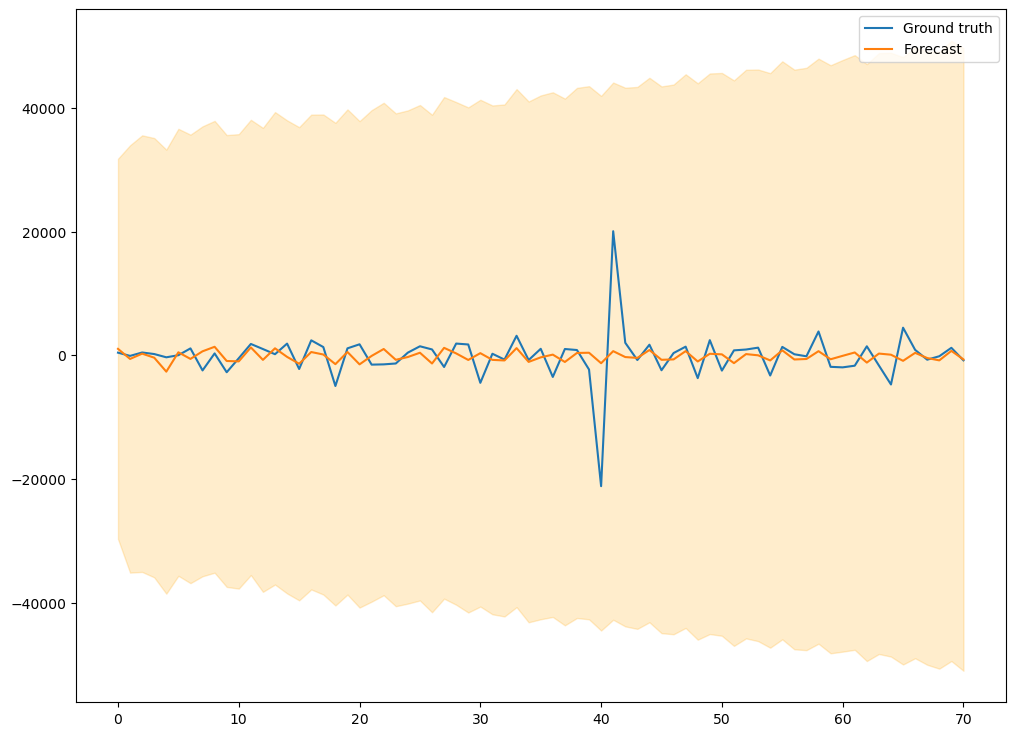

In [13]:
fig,ax=plt.subplots(figsize=(12,9))
ax.plot(testSet.to_numpy(),label="Ground truth")
ax.fill_between(range(len(testSet)), confs[:,0], confs[:,1], alpha=0.2, color='orange')
ax.plot(model.forecast(len(testSet)),label="Forecast")
ax.legend()
# confs

In [14]:
# 差分复原

back = pd.Series(index=raw.loc[:,'Date'], dtype='float64')
back.iloc[1:]=dataSet
back.iloc[0]=repos.loc[1]
back = back.cumsum()
forecasts = model.get_forecast(steps=60, alpha=0.01, typ='mean') 
forecast = model.forecast(60)
forecast[0]+=back[len(back)-1]
final = forecast.cumsum().round()
final
# back

array([42287., 41689., 41950., 41555., 38903., 39379., 38787., 39425.,
       40792., 39864., 38874., 40138., 39392., 40514., 40249., 38874.,
       39395., 39514., 38075., 38600., 37126., 37021., 38032., 37296.,
       37012., 37418., 36085., 37282., 37578., 36819., 37158., 36409.,
       35567., 36720., 35644., 35303., 35405., 34318., 34690., 35095.,
       33806., 34469., 34177., 33747., 34592., 33856., 33185., 33853.,
       32845., 33084., 33227., 31953., 32141., 32130., 31292., 32089.,
       31404., 30800., 31458., 30809.])

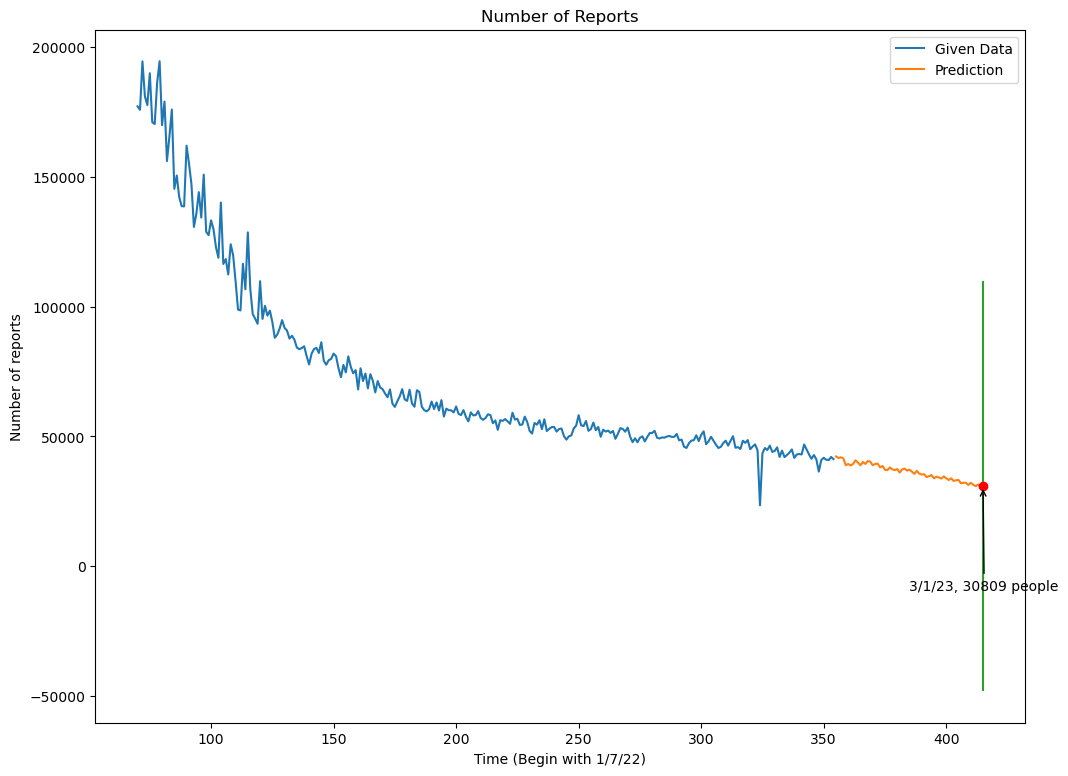

In [18]:
fig,ax=plt.subplots(figsize=(12, 9))

offset = 70
ax.plot(range(offset,len(back)),back[offset:], label ="Given Data")
ax.plot(range(len(back),len(back)+60),final, label ="Prediction")
ax.set_xlabel("Time (Begin with 1/7/22)")
ax.set_ylabel("Number of reports")
ax.set_title("Number of Reports")
# ax.scatter([], final[], color='red')
ax.errorbar(len(back)+60,final[len(final)-1],  final[len(final)-1]-forecasts.conf_int(alpha=0.1)[len(final)-1][0])
ax.plot(len(back)+60,final[len(final)-1],'ro')
ax.annotate("3/1/23, "+str(int(final[len(final)-1]))+" people", xy=(len(back)+60,final[len(final)-1]),xytext=(len(back)+30,final[len(final)-1]-40000),arrowprops=dict(facecolor='red', arrowstyle='->'))
ax.legend()